Automatically created module for IPython interactive environment


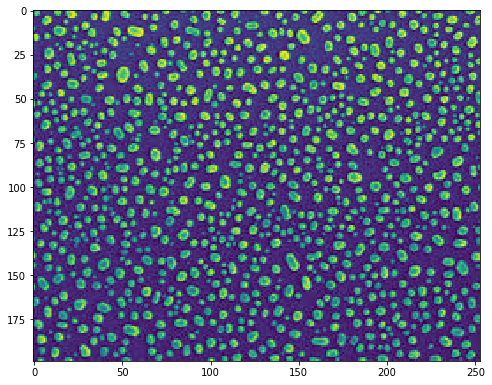

In [25]:
from skimage.data import coins
from sklearn.externals._pilutil import imresize
import Dataset
from Utils import image_to_grayscale, visualize
print(__doc__)

# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>, Brian Cheung
# License: BSD 3 clause

import time

import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from sklearn.utils.testing import SkipTest
from sklearn.utils.fixes import sp_version

if sp_version < (0, 12):
    raise SkipTest("Skipping because SciPy version earlier than 0.12.0 and "
                   "thus does not include the scipy.misc.face() image.")


# load the raccoon face as a numpy array

face = Dataset.easy()
face = image_to_grayscale(face)
visualize(face)

# Resize it to 10% of the original size to speed up the processing
face = imresize(face, 256 / np.max(face.shape)) / 255.
face = face[:32,:32]

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(face)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 0
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 32

/home/toliak/.local/share/virtualenvs/neural_network-Apv45huk/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'contours'
  from ipykernel import kernelapp as app


Spectral clustering: kmeans, 0.79s


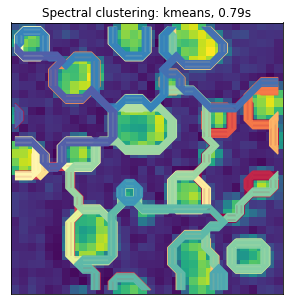

In [26]:
#############################################################################
# Visualize the resulting regions

for assign_labels in ('kmeans',):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[cm.get_cmap("Spectral")(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()
